# Introduction

Our objective is to analyze crime data in Philadelphia from the past 10 full years (2011 - 2020).  We will be addressing the following questions:

1. What type of crime is most common in Philadelphia?
2. What time of day are certain crimes more likely to occur?
3. Over the course of the ten year time frame, how has crime changed?
    - How have violent crimes vs nonviolent crimes changed over the years?
4. Which days have the highest amounts of crime? The lowest amounts of crime?
5. In which neighborhoods do the certain crimes take place?


## Data:

https://www.opendataphilly.org/dataset/crime-incidents


## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib import dates

In [2]:
crime_2011 = pd.read_csv("2011.csv")
crime_2012 = pd.read_csv("2012.csv")
crime_2013 = pd.read_csv("2013.csv")
crime_2014 = pd.read_csv("2014.csv")
crime_2015 = pd.read_csv("2015.csv")
crime_2016 = pd.read_csv("2016.csv")
crime_2017 = pd.read_csv("2017.csv")
crime_2018 = pd.read_csv("2018.csv")
crime_2019 = pd.read_csv("2019.csv")
crime_2020 = pd.read_csv("2020.csv")

/Users/chrischung/opt/anaconda3/envs/snowflakes/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
crime_2011.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,111,2,1,2011-09-08 11:27:00,2011-09-08,11:27:00,11,201102059237,5900 BLOCK LORETTO AVE,500,Burglary Residential,-75.084372,40.034867,40.034867,-75.084372


In [4]:
crime_2012.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,126,12,1,2012-06-13 21:28:00,2012-06-13,21:28:00,21,201212043124,6600 BLOCK ESSINGTON AVE,300,Robbery Firearm,-75.220592,39.91443,39.91443,-75.220592


In [5]:
crime_2013.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,107,6,1,2013-05-28 09:43:00,2013-05-28,09:43:00,9,201306025636,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441


In [6]:
crime_2014.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,110,6,1,2014-01-27 13:12:00,2014-01-27,13:12:00,13.0,201406003790,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441


In [7]:
crime_2015.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,120,12,1,2015-01-15 08:58:00,2015-01-15,08:58:00,8,201512003444,6600 BLOCK ESSINGTON AVE,500,Burglary Non-Residential,-75.220592,39.91443,39.91443,-75.220592


In [8]:
crime_2016.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,122,12,1,2016-12-21 21:29:00,2016-12-21,21:29:00,21,201612086657,6600 BLOCK ESSINGTON AVE,300,Robbery No Firearm,-75.220592,39.91443,39.91443,-75.220592


In [9]:
crime_2017.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,124,12,1,2017-10-18 00:10:00,2017-10-18,00:10:00,0,201712078257,6600 BLOCK ESSINGTON AVE,300,Robbery Firearm,-75.220592,39.91443,39.91443,-75.220592


In [10]:
crime_2018.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,117,12,1,2018-01-06 10:56:00,2018-01-06,10:56:00,10.0,201812001185,6600 BLOCK ESSINGTON AVE,600,Thefts,-75.220592,39.91443,39.91443,-75.220592


In [11]:
crime_2019.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,13,9,1,2019-11-12 09:59:00,2019-11-12,09:59:00,9.0,201909047628,100 BLOCK S BROAD ST,600,Thefts,-75.066628,40.049264,40.049264,-75.066628


In [12]:
crime_2020.head(1)

,the_geom,cartodb_id,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,0101000020E6100000CE175A2155CA52C0779E57C02DFB...,47,0101000020110F00009EBBEA78D5EA5FC11055888E8D8A...,22,9,2,2020-03-25 18:32:00,2020-03-25,18:32:00,18.0,202009012094,1400 BLOCK SPRING GARDEN ST,600,Theft from Vehicle,-75.161446,39.962334,39.962334,-75.161446


Our crime_2020 dataframe has additional columns that do not match the rest of them so we will drop these columns.

In [13]:
crime_2020 = crime_2020.drop(['the_geom', 'cartodb_id', 'the_geom_webmercator'], axis = 1)
crime_2020.head(1)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,22,9,2,2020-03-25 18:32:00,2020-03-25,18:32:00,18.0,202009012094,1400 BLOCK SPRING GARDEN ST,600,Theft from Vehicle,-75.161446,39.962334,39.962334,-75.161446


We will now concatenate all 10 dataframes into one dataframe, called 'df'.

In [14]:
all_years = [crime_2011, crime_2012, crime_2013, crime_2014, crime_2015, crime_2016, crime_2017, crime_2018, crime_2019, crime_2020]
df = pd.concat(all_years, axis = 0, ignore_index = True)

In [15]:
df.head()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,111,2,1,2011-09-08 11:27:00,2011-09-08,11:27:00,11.0,201102059237,5900 BLOCK LORETTO AVE,500,Burglary Residential,-75.084372,40.034867,40.034867,-75.084372
1,3,14,2,2011-11-10 14:52:00,2011-11-10,14:52:00,14.0,201114083412,300 BLOCK E WALNUT LN,500,Burglary Residential,-75.173378,40.045752,40.045752,-75.173378
2,41,9,2,2011-06-16 16:23:00,2011-06-16,16:23:00,16.0,201109028302,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446
3,56,15,3,2011-07-14 17:37:00,2011-07-14,17:37:00,17.0,201115070879,4400 BLOCK LORING ST,500,Burglary Residential,-75.034084,40.034502,40.034502,-75.034084
4,100,6,1,2011-06-30 19:18:00,2011-06-30,19:18:00,19.0,201106033293,N 02ND ST / SPRING GARDEN ST,300,Robbery No Firearm,-75.141441,39.960712,39.960712,-75.141441


We'll compare the shape of each individual year's dataframe with the combined dataframe to confirm:

In [16]:
print('# rows of 2011:', crime_2011.shape[0])
print('# rows of 2012:', crime_2012.shape[0])
print('# rows of 2013:', crime_2013.shape[0])
print('# rows of 2014:', crime_2014.shape[0])
print('# rows of 2015:', crime_2015.shape[0])
print('# rows of 2016:', crime_2016.shape[0])
print('# rows of 2017:', crime_2017.shape[0])
print('# rows of 2018:', crime_2018.shape[0])
print('# rows of 2019:', crime_2019.shape[0])
print('# rows of 2020:', crime_2020.shape[0])

total_rows = crime_2011.shape[0] + \
             crime_2012.shape[0] + \
             crime_2013.shape[0] + \
             crime_2014.shape[0] + \
             crime_2015.shape[0] + \
             crime_2016.shape[0] + \
             crime_2017.shape[0] + \
             crime_2018.shape[0] + \
             crime_2019.shape[0] + \
             crime_2020.shape[0]
print('Total rows:', total_rows)

print('# rows of combined dataframe:', df.shape[0])

# rows of 2011: 187552
# rows of 2012: 186990
# rows of 2013: 176790
# rows of 2014: 176442
# rows of 2015: 174723
# rows of 2016: 159882
# rows of 2017: 157630
# rows of 2018: 153053
# rows of 2019: 161439
# rows of 2020: 139280
Total rows: 1673781
# rows of combined dataframe: 1673781


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1673781 entries, 0 to 1673780
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   objectid            1673781 non-null  int64  
 1   dc_dist             1673781 non-null  int64  
 2   psa                 1673509 non-null  object 
 3   dispatch_date_time  1673781 non-null  object 
 4   dispatch_date       1673781 non-null  object 
 5   dispatch_time       1673781 non-null  object 
 6   hour_               1673776 non-null  float64
 7   dc_key              1673781 non-null  int64  
 8   location_block      1673781 non-null  object 
 9   ucr_general         1673781 non-null  int64  
 10  text_general_code   1673781 non-null  object 
 11  point_x             1673598 non-null  float64
 12  point_y             1673598 non-null  float64
 13  lat                 1673598 non-null  float64
 14  lng                 1673598 non-null  float64
dtypes: float64(5), 

Taken from https://metadata.phila.gov/#home/datasetdetails/5543868920583086178c4f8e/representationdetails/570e7621c03327dc14f4b68d/?view_287_per_page=25&view_287_page=1
here are the definitions of some variables that may be unclear:

- <b>dc_dist</b>: A two character field that names the District boundary.
- <b>psa</b>: A single character field that names the Police Service Area boundary.
- <b>dispatch_date_time</b>: The date and time that the officer was dispatched to the scene.
- <b>dispatch_date</b>: Dispatch date formatted as a string
- <b>dispatch_time</b>: Dispatch time formatted as a string
- <b>hour_</b>: The generalized hour of the dispatched time.
- <b>dc_key</b>: The unique identifier of the crime that consists of Year + District + Unique ID.
- <b>location_block</b>: The location of crime generalized by street block.
- <b>ucr_general</b>: The rounded crime code
- <b>text_general_code</b>: The generalized text for the crime code

## Data Cleaning

In [18]:
df.isnull().sum()

objectid                0
dc_dist                 0
psa                   272
dispatch_date_time      0
dispatch_date           0
dispatch_time           0
hour_                   5
dc_key                  0
location_block          0
ucr_general             0
text_general_code       0
point_x               183
point_y               183
lat                   183
lng                   183
dtype: int64

(array([   3114.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1670484.]),
 array([28.41954829, 29.59136475, 30.7631812 , 31.93499766, 33.10681411,
        34.27863057, 35.45044703, 36.62226348, 37.79407994, 38.96589639,
        40.13771285]),
 <BarContainer object of 10 artists>)

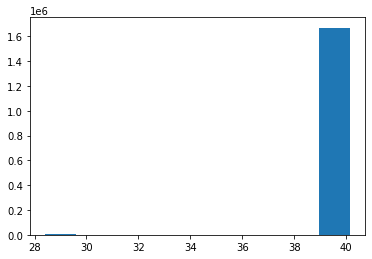

In [19]:
plt.hist(df['lat'])

(array([   3114.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1670484.]),
 array([-81.58137853, -80.91899392, -80.25660931, -79.5942247 ,
        -78.93184009, -78.26945548, -77.60707088, -76.94468627,
        -76.28230166, -75.61991705, -74.95753244]),
 <BarContainer object of 10 artists>)

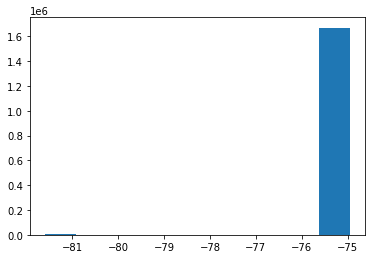

In [20]:
plt.hist(df['lng'])

We notice that there are a few extreme outliers in our latitude and longitude columns.  Having mapped some of these coordinates, we know that they are not in Philadelphia and are most likely entry errors.  For the purpose of this EDA notebook, we will simply drop these rows.

In [21]:
df = df[df['lat']>30]

(array([  6862., 114823., 254907., 332694., 347300., 269543., 233423.,
         77955.,  25159.,   7818.]),
 array([39.87502075, 39.90128996, 39.92755917, 39.95382838, 39.98009759,
        40.0063668 , 40.03263601, 40.05890522, 40.08517443, 40.11144364,
        40.13771285]),
 <BarContainer object of 10 artists>)

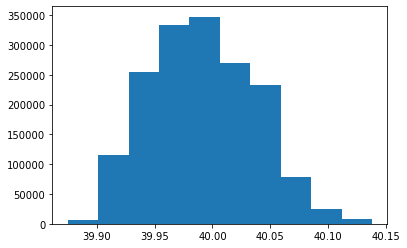

In [22]:
plt.hist(df['lat'])

(array([ 20164., 285878., 148493., 499862., 314375., 150221., 132626.,
         72472.,  27393.,  19000.]),
 array([-75.27898186, -75.24683692, -75.21469198, -75.18254703,
        -75.15040209, -75.11825715, -75.08611221, -75.05396727,
        -75.02182232, -74.98967738, -74.95753244]),
 <BarContainer object of 10 artists>)

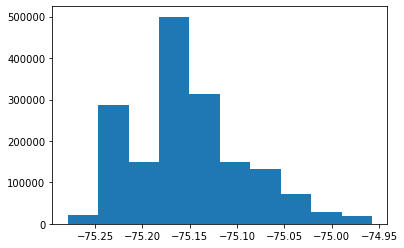

In [23]:
plt.hist(df['lng'])

In [24]:
# convert dates to datetime object
df['dispatch_date_time'] = pd.to_datetime(df['dispatch_date_time'])
df['dispatch_date'] = pd.to_datetime(df['dispatch_date'])

In [25]:
df.head()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,111,2,1,2011-09-08 11:27:00,2011-09-08,11:27:00,11.0,201102059237,5900 BLOCK LORETTO AVE,500,Burglary Residential,-75.084372,40.034867,40.034867,-75.084372
1,3,14,2,2011-11-10 14:52:00,2011-11-10,14:52:00,14.0,201114083412,300 BLOCK E WALNUT LN,500,Burglary Residential,-75.173378,40.045752,40.045752,-75.173378
2,41,9,2,2011-06-16 16:23:00,2011-06-16,16:23:00,16.0,201109028302,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446
3,56,15,3,2011-07-14 17:37:00,2011-07-14,17:37:00,17.0,201115070879,4400 BLOCK LORING ST,500,Burglary Residential,-75.034084,40.034502,40.034502,-75.034084
4,100,6,1,2011-06-30 19:18:00,2011-06-30,19:18:00,19.0,201106033293,N 02ND ST / SPRING GARDEN ST,300,Robbery No Firearm,-75.141441,39.960712,39.960712,-75.141441


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670484 entries, 0 to 1673780
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   objectid            1670484 non-null  int64         
 1   dc_dist             1670484 non-null  int64         
 2   psa                 1670224 non-null  object        
 3   dispatch_date_time  1670484 non-null  datetime64[ns]
 4   dispatch_date       1670484 non-null  datetime64[ns]
 5   dispatch_time       1670484 non-null  object        
 6   hour_               1670479 non-null  float64       
 7   dc_key              1670484 non-null  int64         
 8   location_block      1670484 non-null  object        
 9   ucr_general         1670484 non-null  int64         
 10  text_general_code   1670484 non-null  object        
 11  point_x             1670484 non-null  float64       
 12  point_y             1670484 non-null  float64       
 13  lat         

We'll analyze the 'text_general_code' column.

In [27]:
sorted(df['text_general_code'].unique())

['Aggravated Assault Firearm',
 'Aggravated Assault No Firearm',
 'All Other Offenses',
 'Arson',
 'Burglary Non-Residential',
 'Burglary Residential',
 'DRIVING UNDER THE INFLUENCE',
 'Disorderly Conduct',
 'Embezzlement',
 'Forgery and Counterfeiting',
 'Fraud',
 'Gambling Violations',
 'Homicide - Criminal',
 'Homicide - Criminal ',
 'Homicide - Gross Negligence',
 'Homicide - Justifiable ',
 'Liquor Law Violations',
 'Motor Vehicle Theft',
 'Narcotic / Drug Law Violations',
 'Offenses Against Family and Children',
 'Other Assaults',
 'Other Sex Offenses (Not Commercialized)',
 'Prostitution and Commercialized Vice',
 'Public Drunkenness',
 'Rape',
 'Receiving Stolen Property',
 'Recovered Stolen Motor Vehicle',
 'Robbery Firearm',
 'Robbery No Firearm',
 'Theft from Vehicle',
 'Thefts',
 'Vagrancy/Loitering',
 'Vandalism/Criminal Mischief',
 'Weapon Violations']

A couple duplicate values that we can rename as one value:

- 'Homicide - Criminal' and 'Homicide - Criminal '

In [28]:
df['text_general_code'].replace({'Homicide - Criminal ': 'Homicide - Criminal', 'Homicide - Justifiable ':'Homicide - Justifiable'}, inplace=True)

In [29]:
sorted(df['text_general_code'].unique())

['Aggravated Assault Firearm',
 'Aggravated Assault No Firearm',
 'All Other Offenses',
 'Arson',
 'Burglary Non-Residential',
 'Burglary Residential',
 'DRIVING UNDER THE INFLUENCE',
 'Disorderly Conduct',
 'Embezzlement',
 'Forgery and Counterfeiting',
 'Fraud',
 'Gambling Violations',
 'Homicide - Criminal',
 'Homicide - Gross Negligence',
 'Homicide - Justifiable',
 'Liquor Law Violations',
 'Motor Vehicle Theft',
 'Narcotic / Drug Law Violations',
 'Offenses Against Family and Children',
 'Other Assaults',
 'Other Sex Offenses (Not Commercialized)',
 'Prostitution and Commercialized Vice',
 'Public Drunkenness',
 'Rape',
 'Receiving Stolen Property',
 'Recovered Stolen Motor Vehicle',
 'Robbery Firearm',
 'Robbery No Firearm',
 'Theft from Vehicle',
 'Thefts',
 'Vagrancy/Loitering',
 'Vandalism/Criminal Mischief',
 'Weapon Violations']

### 1. What type of crime is most common in Philadelphia?

In [30]:
crime_types = df.groupby('text_general_code')['dc_key'].count().sort_values(ascending=False)
crime_types.head()

text_general_code
All Other Offenses             323488
Other Assaults                 236399
Thefts                         230512
Vandalism/Criminal Mischief    152796
Theft from Vehicle             134505
Name: dc_key, dtype: int64

<AxesSubplot:xlabel='dc_key', ylabel='text_general_code'>

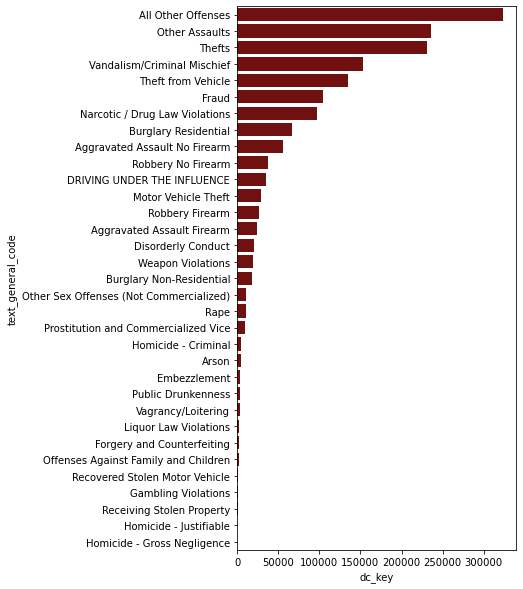

In [31]:
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(x=crime_types, y=crime_types.index, orient='h', ax = ax, color = 'maroon')

Let's create a binary column called "violent_crime" which will indicate if the crime is classified as violent.  We'll use this in later analysis.

Crimes will be identified as violent based on the FBI's definition of violent crime:
https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/violent-crime/violent-crime

In [32]:
violent_crimes = ['Aggravated Assault Firearm',
                  'Aggravated Assault No Firearm',
                  'Homicide - Criminal',
                  'Homicide - Gross Negligence',
                  'Homicide - Justifiable',
                  'Rape',
                  'Robbery Firearm',
                  'Robbery No Firearm',
                 ]

In [33]:
df['violent_crime'] = df['text_general_code'].isin(violent_crimes)

### 2. What time of day are certain crimes more likely to occur?

Let's first get a count of total crimes by hour.

line plot of time of day, multiple lines for different types of crime

In [34]:
hour_count = df.groupby('hour_')['dc_key'].count()
hour_count

hour_
0.0      71082
1.0      55918
2.0      41451
3.0      29659
4.0      19765
5.0      15687
6.0      14652
7.0      29787
8.0      58713
9.0      76047
10.0     86175
11.0     92721
12.0     92451
13.0     90709
14.0     74991
15.0     85327
16.0    108809
17.0    103499
18.0     96273
19.0     95537
20.0     90926
21.0     85918
22.0     80199
23.0     74183
Name: dc_key, dtype: int64

<AxesSubplot:xlabel='hour_', ylabel='dc_key'>

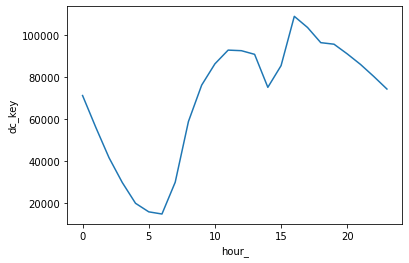

In [35]:
sns.lineplot(x = hour_count.index, y = hour_count)

The least amount of crime happens during the early morning hours, from 4-7 AM. 

The highest amount of crime takes place from 9 AM - 1 AM, with a peak at 4 PM.

Here, we will take a look at the top five crimes broken down by hour.

In [36]:
top_crime_cats = ['All Other Offenses', 'Other Assaults', 'Thefts', 'Vandalism/Criminal Mischief', 'Theft from Vehicle']

<AxesSubplot:xlabel='hour_'>

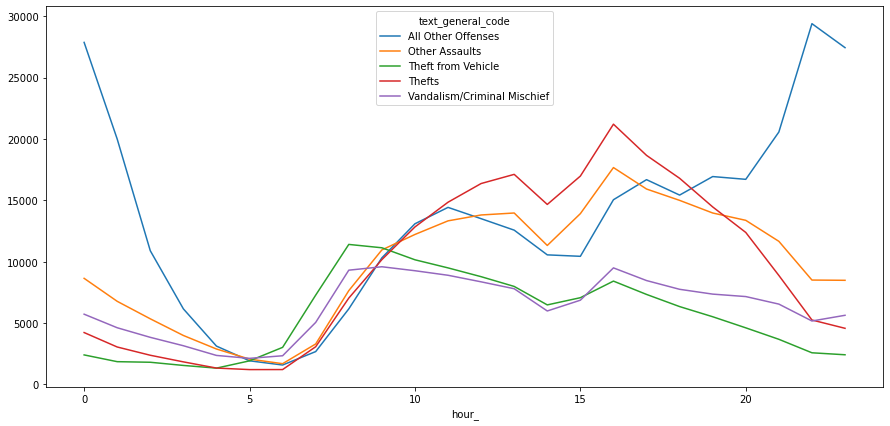

In [37]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df[df['text_general_code'].isin(top_crime_cats)].groupby(['hour_','text_general_code']).count()['dc_key'].unstack().plot(ax=ax)

Interestingly enough, while other crimes seem to decrease from 8 PM to 12 AM, crimes categorized by "All Other Offenses" is the only type of crime (out of the top five) that increases in frequency during that time period.

## 3. Over the course of the ten year time frame, how has crime changed?
a) Which crimes have become less common?

b) Which crimes have become more common?

We'll start by counting the number of crimes grouped by date and construct a time series graph.

In [38]:
date_count = df.groupby('dispatch_date')['dc_key'].count()
date_count

dispatch_date
2011-01-01    447
2011-01-02    422
2011-01-03    491
2011-01-04    515
2011-01-05    556
             ... 
2020-12-27    287
2020-12-28    393
2020-12-29    375
2020-12-30    391
2020-12-31    311
Name: dc_key, Length: 3653, dtype: int64

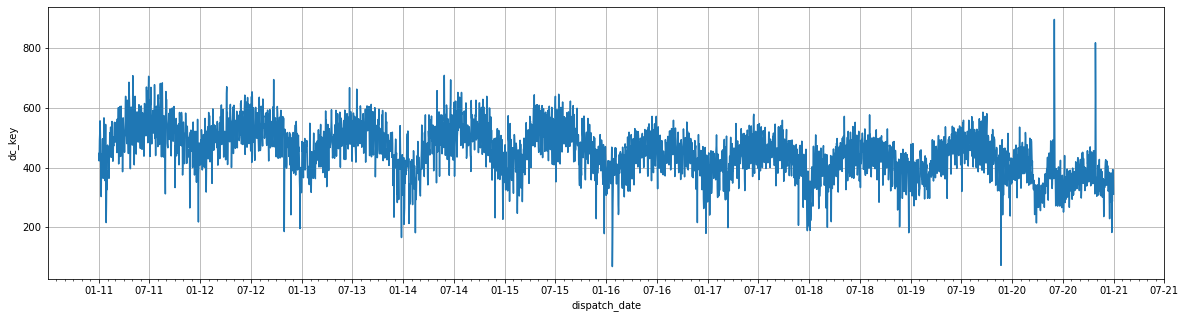

In [39]:
fig, ax = plt.subplots(figsize=(20,5))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)
sns.lineplot(x = date_count.index, y = date_count, ax = ax)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

From this graph, we can see that crime rates are slowly decreasing over the past 10 years.  Interestingly enough, there are two dates in 2020 that seem to have spikes in crime.  We will identify which dates those are and investigate further later on.

Let's extract the year_month to see a slightly different visualization.

In [40]:
df['year_month'] = pd.to_datetime(df['dispatch_date']).dt.to_period('M')
df.head()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng,violent_crime,year_month
0,111,2,1,2011-09-08 11:27:00,2011-09-08,11:27:00,11.0,201102059237,5900 BLOCK LORETTO AVE,500,Burglary Residential,-75.084372,40.034867,40.034867,-75.084372,False,2011-09
1,3,14,2,2011-11-10 14:52:00,2011-11-10,14:52:00,14.0,201114083412,300 BLOCK E WALNUT LN,500,Burglary Residential,-75.173378,40.045752,40.045752,-75.173378,False,2011-11
2,41,9,2,2011-06-16 16:23:00,2011-06-16,16:23:00,16.0,201109028302,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446,False,2011-06
3,56,15,3,2011-07-14 17:37:00,2011-07-14,17:37:00,17.0,201115070879,4400 BLOCK LORING ST,500,Burglary Residential,-75.034084,40.034502,40.034502,-75.034084,False,2011-07
4,100,6,1,2011-06-30 19:18:00,2011-06-30,19:18:00,19.0,201106033293,N 02ND ST / SPRING GARDEN ST,300,Robbery No Firearm,-75.141441,39.960712,39.960712,-75.141441,True,2011-06


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670484 entries, 0 to 1673780
Data columns (total 17 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   objectid            1670484 non-null  int64         
 1   dc_dist             1670484 non-null  int64         
 2   psa                 1670224 non-null  object        
 3   dispatch_date_time  1670484 non-null  datetime64[ns]
 4   dispatch_date       1670484 non-null  datetime64[ns]
 5   dispatch_time       1670484 non-null  object        
 6   hour_               1670479 non-null  float64       
 7   dc_key              1670484 non-null  int64         
 8   location_block      1670484 non-null  object        
 9   ucr_general         1670484 non-null  int64         
 10  text_general_code   1670484 non-null  object        
 11  point_x             1670484 non-null  float64       
 12  point_y             1670484 non-null  float64       
 13  lat         

In [42]:
df['year_month'] = df['year_month'].astype(str)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670484 entries, 0 to 1673780
Data columns (total 17 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   objectid            1670484 non-null  int64         
 1   dc_dist             1670484 non-null  int64         
 2   psa                 1670224 non-null  object        
 3   dispatch_date_time  1670484 non-null  datetime64[ns]
 4   dispatch_date       1670484 non-null  datetime64[ns]
 5   dispatch_time       1670484 non-null  object        
 6   hour_               1670479 non-null  float64       
 7   dc_key              1670484 non-null  int64         
 8   location_block      1670484 non-null  object        
 9   ucr_general         1670484 non-null  int64         
 10  text_general_code   1670484 non-null  object        
 11  point_x             1670484 non-null  float64       
 12  point_y             1670484 non-null  float64       
 13  lat         

In [44]:
year_month_count = df.groupby('year_month')['dc_key'].count()
year_month_count

year_month
2011-01    13130
2011-02    13225
2011-03    16032
2011-04    16252
2011-05    16722
           ...  
2020-08    11284
2020-09    11583
2020-10    13042
2020-11    10494
2020-12    10742
Name: dc_key, Length: 120, dtype: int64

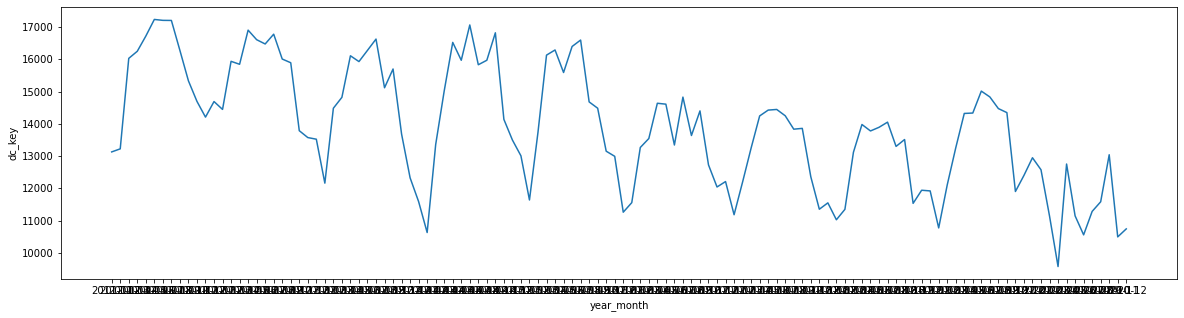

In [45]:
fig, ax = plt.subplots(figsize=(20,5))

sns.lineplot(x = year_month_count.index, y = year_month_count, ax = ax)

plt.show()

Let's look at the time series graphs of violent crimes vs non-violent crimes.

In [46]:
violent_date_count = df[df['violent_crime']==True].groupby('dispatch_date')['dc_key'].count()
violent_date_count

dispatch_date
2011-01-01    65
2011-01-02    39
2011-01-03    51
2011-01-04    54
2011-01-05    53
              ..
2020-12-27    33
2020-12-28    46
2020-12-29    37
2020-12-30    44
2020-12-31    40
Name: dc_key, Length: 3653, dtype: int64

In [47]:
nonviolent_date_count = df[df['violent_crime']==False].groupby('dispatch_date')['dc_key'].count()
nonviolent_date_count

dispatch_date
2011-01-01    382
2011-01-02    383
2011-01-03    440
2011-01-04    461
2011-01-05    503
             ... 
2020-12-27    254
2020-12-28    347
2020-12-29    338
2020-12-30    347
2020-12-31    271
Name: dc_key, Length: 3653, dtype: int64

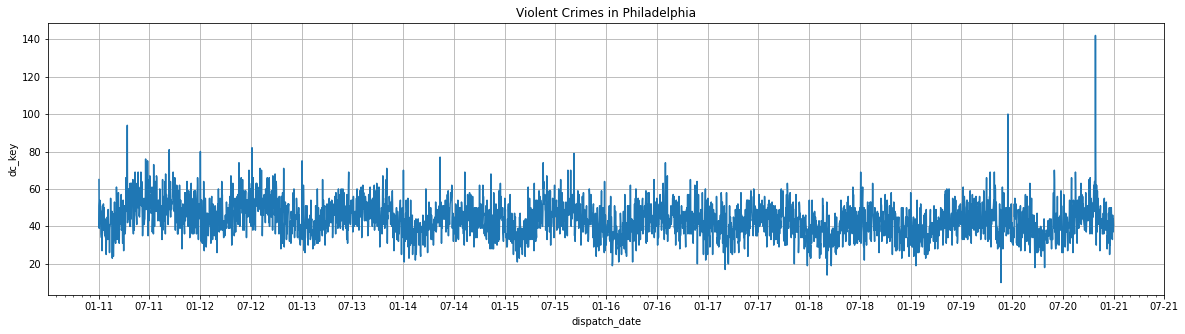

In [48]:
fig, ax = plt.subplots(figsize=(20,5))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)
sns.lineplot(x = violent_date_count.index, y = violent_date_count, ax = ax)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.title('Violent Crimes in Philadelphia')
plt.show()

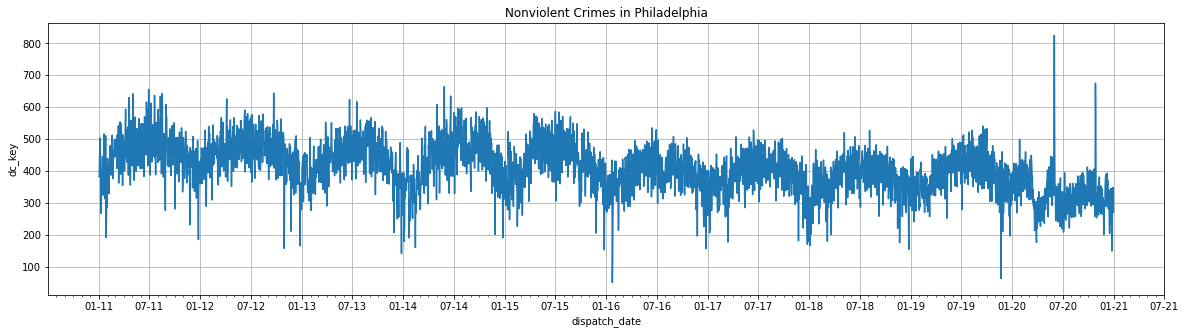

In [49]:
fig, ax = plt.subplots(figsize=(20,5))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)
sns.lineplot(x = nonviolent_date_count.index, y = nonviolent_date_count, ax = ax)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.title('Nonviolent Crimes in Philadelphia')
plt.show()

Nonviolent crimes have definitely decreased over the past 10 years, with a sharp drop at 2016.

Violent crimes have tended to decrease, but it seems like it may have slightly increased over the span of the last two years.  It may be worth counting the number of violent crimes per year.

In [50]:
df['year'] = df['dispatch_date'].dt.year
df['month'] = df['dispatch_date'].dt.month
df.head()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng,violent_crime,year_month,year,month
0,111,2,1,2011-09-08 11:27:00,2011-09-08,11:27:00,11.0,201102059237,5900 BLOCK LORETTO AVE,500,Burglary Residential,-75.084372,40.034867,40.034867,-75.084372,False,2011-09,2011,9
1,3,14,2,2011-11-10 14:52:00,2011-11-10,14:52:00,14.0,201114083412,300 BLOCK E WALNUT LN,500,Burglary Residential,-75.173378,40.045752,40.045752,-75.173378,False,2011-11,2011,11
2,41,9,2,2011-06-16 16:23:00,2011-06-16,16:23:00,16.0,201109028302,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446,False,2011-06,2011,6
3,56,15,3,2011-07-14 17:37:00,2011-07-14,17:37:00,17.0,201115070879,4400 BLOCK LORING ST,500,Burglary Residential,-75.034084,40.034502,40.034502,-75.034084,False,2011-07,2011,7
4,100,6,1,2011-06-30 19:18:00,2011-06-30,19:18:00,19.0,201106033293,N 02ND ST / SPRING GARDEN ST,300,Robbery No Firearm,-75.141441,39.960712,39.960712,-75.141441,True,2011-06,2011,6


In [51]:
violent_year_count = df[df['violent_crime']==True].groupby('year')['dc_key'].count()
nonviolent_year_count = df[df['violent_crime']==False].groupby('year')['dc_key'].count()

Text(0.5, 1.0, 'Violent crimes by year')

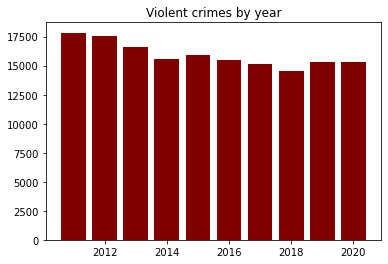

In [52]:
plt.bar(violent_year_count.index, violent_year_count, color = 'maroon')
plt.title('Violent crimes by year')

Indeed violent crimes have increased starting in 2019.

Text(0.5, 1.0, 'Nonviolent crimes by year')

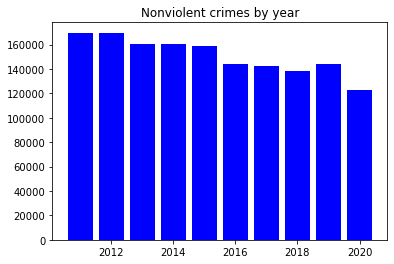

In [53]:
plt.bar(nonviolent_year_count.index, nonviolent_year_count, color = 'blue')
plt.title('Nonviolent crimes by year')

Let's look at the number of crimes within each year for all of the 10 years.

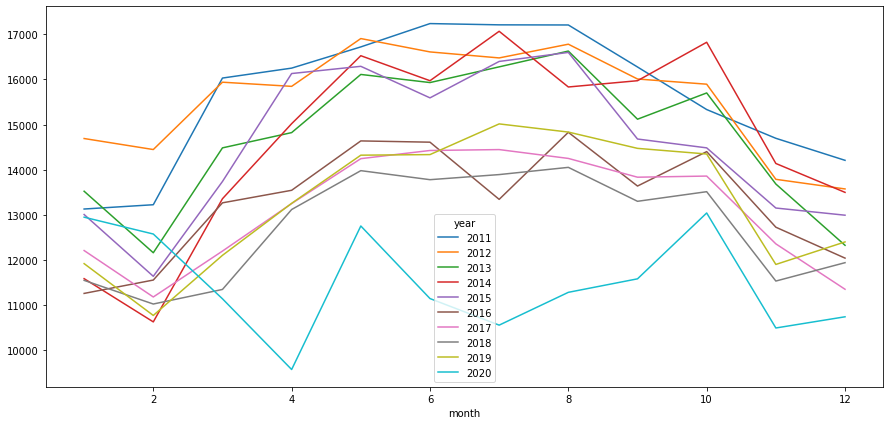

In [54]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['month','year']).count()['dc_key'].unstack().plot(ax=ax)
plt.show()

In general, there seems to be a seasonality to crime, with the highest numbers taking place during warmer months (June, July, August) and the lowest numbers taking place during colder months (December, January, February).

In most years, crime rates pick up again starting in March. Interestingly enough, for the year 2020, crime rates severely decreased in March and April.  Most likely, this is due to the city-wide lockdown to prevent the spread of COVID-19.

## 4. Which days have the highest number of of crimes? The lowest number of crimes?

In [55]:
date_count.nlargest(5)

dispatch_date
2020-06-01    895
2020-10-27    817
2014-05-28    708
2011-05-03    707
2011-06-29    705
Name: dc_key, dtype: int64

In [56]:
df[df['dispatch_date']=='2020-06-01']['text_general_code'].value_counts()

Burglary Non-Residential                   418
Vandalism/Criminal Mischief                142
All Other Offenses                          70
Other Assaults                              38
Motor Vehicle Theft                         36
Theft from Vehicle                          26
Aggravated Assault No Firearm               24
Thefts                                      21
Aggravated Assault Firearm                  21
Weapon Violations                           16
Fraud                                       14
Recovered Stolen Motor Vehicle              14
Robbery No Firearm                          10
Arson                                        9
Robbery Firearm                              8
Burglary Residential                         7
Disorderly Conduct                           6
Homicide - Criminal                          5
Narcotic / Drug Law Violations               3
DRIVING UNDER THE INFLUENCE                  3
Rape                                         2
Other Sex Off

In [57]:
df[df['dispatch_date']=='2020-10-27']['text_general_code'].value_counts()

Burglary Non-Residential                   279
Vandalism/Criminal Mischief                101
Thefts                                      67
Aggravated Assault No Firearm               67
Other Assaults                              54
Theft from Vehicle                          41
Motor Vehicle Theft                         35
Aggravated Assault Firearm                  30
All Other Offenses                          29
Fraud                                       26
Robbery Firearm                             18
Weapon Violations                           17
Robbery No Firearm                          13
Homicide - Criminal                         10
Burglary Residential                         9
Narcotic / Drug Law Violations               5
Rape                                         4
Arson                                        4
Disorderly Conduct                           4
Offenses Against Family and Children         2
Other Sex Offenses (Not Commercialized)      2
Name: text_ge

The two days with the highest amount of crime in are 2020-06-01 and 2020-10-27. After further research, we find that there is significance in these two dates in the city of Philadelphia.

On May 25, 2020, George Floyd was murdered by a police officer, Derek Chauvin in Minneapolis, MN.  Protests in Philadelphia began the next day and lasted for multiple days with its peak on <b>June 1, 2020</b>. During a large demonstration, hundreds of protesters split off from a group and walked onto the interstate 676, at which point a SWAT team appeared and began firing rubber bullets and tear gas into the crowd.  Looting and vandalism continued in Center City and other parts of Philadelphia.

On October 25, 2020, Walter Wallace Jr was shot and killed by Philadelphia police officers. After gaining attention from a cellphone video that was posted and went viral, protests and demonstrations took place across Philadelphia throughout late October.  On the night of October 26 into the morning of <b>October 27</b>, protesters marched through West Philadelphia and the police began to clash with demonstrators.  The violence and unrest spread to other parts of Philadelphia, with the police reporting that there were allegedly 1,000 people looting businesses in the Port Richmond neighborhood of Philadelphia.


<i>Source:</i> \
https://en.wikipedia.org/wiki/George_Floyd_protests_in_Philadelphia
https://en.wikipedia.org/wiki/Killing_of_Walter_Wallace

In [58]:
date_count.nsmallest(15)

dispatch_date
2016-01-23     69
2019-11-22     73
2016-01-24    149
2013-12-25    166
2015-12-25    179
2016-12-25    180
2014-02-13    182
2018-12-25    182
2020-12-25    183
2012-10-29    186
2017-12-25    189
2018-01-04    190
2012-12-25    196
2017-03-14    199
2018-03-07    200
Name: dc_key, dtype: int64

The following are the dates with the lowest number of crimes:

On <b>January 23, 2016</b> a powerful winter storm dumped over 20 inches of snow in many places, which most likely contributed to low number of crime that day.




Source:
https://www.inquirer.com/philly/news/local/20160124_Philadelphia_January_2016_blizzard_updates.html

## 5. In which neighborhoods do the top crimes take place?

In [59]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [60]:
philly_map = gpd.read_file('Neighborhoods_Philadelphia/Neighborhoods_Philadelphia.shp')

In [61]:
philly_map.to_crs(epsg=4326, inplace=True)

<AxesSubplot:>

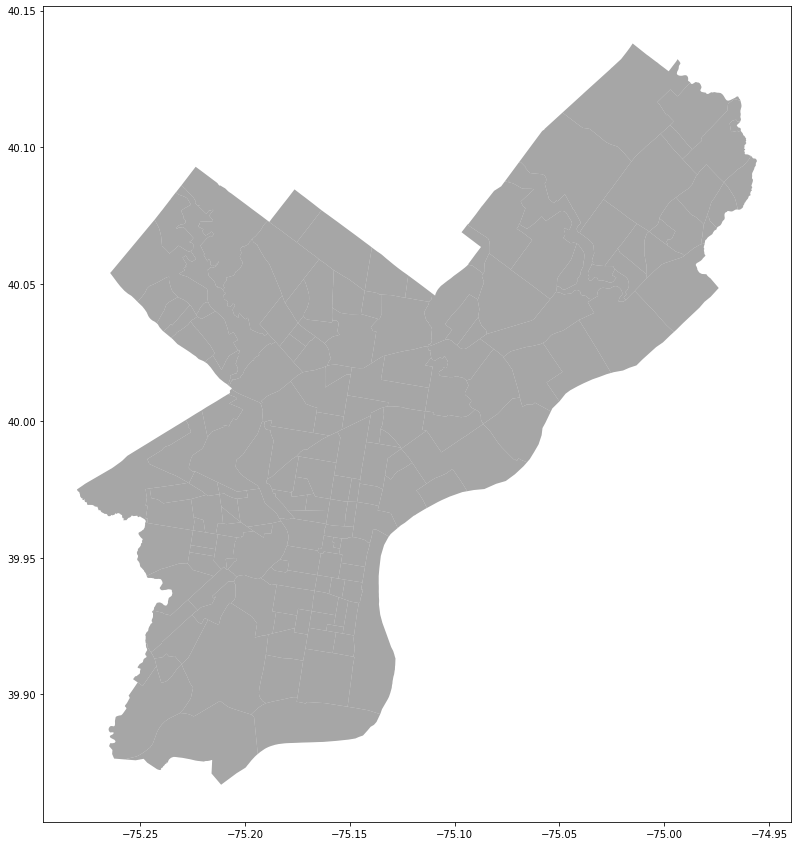

In [62]:
fig,ax = plt.subplots(figsize=(15,15))
philly_map.plot(ax=ax,alpha=0.7,color='grey')

In [63]:
crs = {'init':'epsg:4326'}

In [64]:
geometry = [Point(xy) for xy in zip(df['lng'], df['lat'])]
geometry[:3]

In [65]:
len(geometry) == len(df)

True

In [66]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

/Users/chrischung/opt/anaconda3/envs/snowflakes/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [67]:
geo_df.head()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng,violent_crime,year_month,year,month,geometry
0,111,2,1,2011-09-08 11:27:00,2011-09-08,11:27:00,11.0,201102059237,5900 BLOCK LORETTO AVE,500,Burglary Residential,-75.084372,40.034867,40.034867,-75.084372,False,2011-09,2011,9,POINT (-75.08437 40.03487)
1,3,14,2,2011-11-10 14:52:00,2011-11-10,14:52:00,14.0,201114083412,300 BLOCK E WALNUT LN,500,Burglary Residential,-75.173378,40.045752,40.045752,-75.173378,False,2011-11,2011,11,POINT (-75.17338 40.04575)
2,41,9,2,2011-06-16 16:23:00,2011-06-16,16:23:00,16.0,201109028302,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446,False,2011-06,2011,6,POINT (-75.16145 39.96233)
3,56,15,3,2011-07-14 17:37:00,2011-07-14,17:37:00,17.0,201115070879,4400 BLOCK LORING ST,500,Burglary Residential,-75.034084,40.034502,40.034502,-75.034084,False,2011-07,2011,7,POINT (-75.03408 40.03450)
4,100,6,1,2011-06-30 19:18:00,2011-06-30,19:18:00,19.0,201106033293,N 02ND ST / SPRING GARDEN ST,300,Robbery No Firearm,-75.141441,39.960712,39.960712,-75.141441,True,2011-06,2011,6,POINT (-75.14144 39.96071)


<AxesSubplot:>

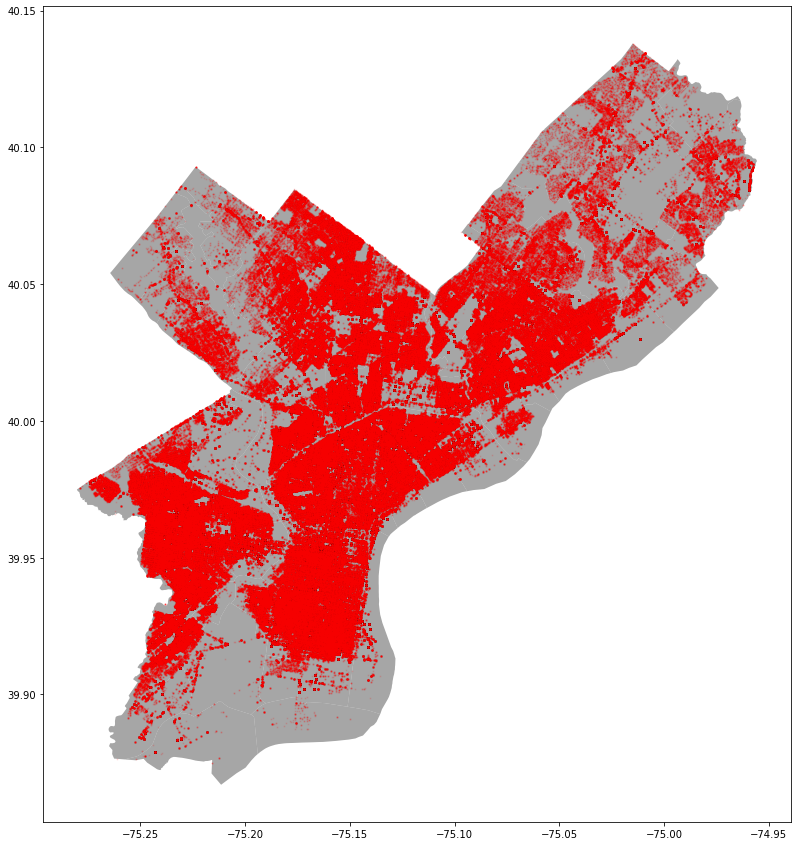

In [68]:
fig, ax = plt.subplots(figsize=(15,15))
philly_map.plot(ax=ax, alpha=0.7,color='grey')

geo_df.plot(ax=ax, markersize=1, color='red', alpha = 0.1)

Let's look at where different types of crimes occur.  We'll focus on the top five crime categories.

Text(0.5, 1.0, 'All Other Offenses')

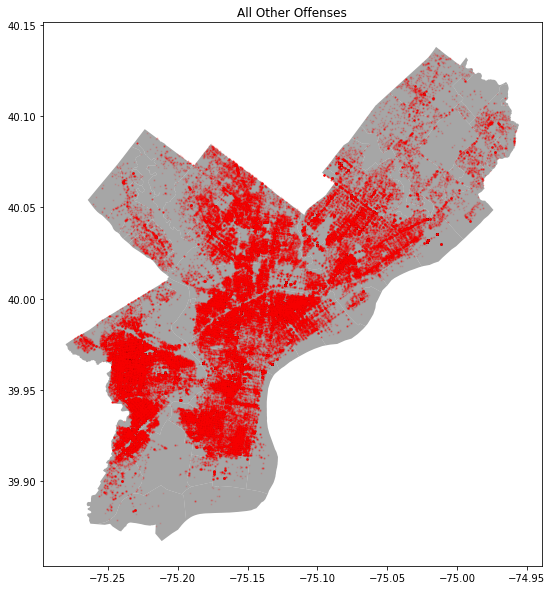

In [69]:
fig, ax = plt.subplots(figsize=(10,10))
philly_map.plot(ax=ax, alpha=0.7,color='grey')

geo_df[geo_df['text_general_code']=='All Other Offenses'].plot(ax=ax, markersize=1, color='red', alpha = 0.1)
plt.title('All Other Offenses')

Text(0.5, 1.0, 'Other Assaults')

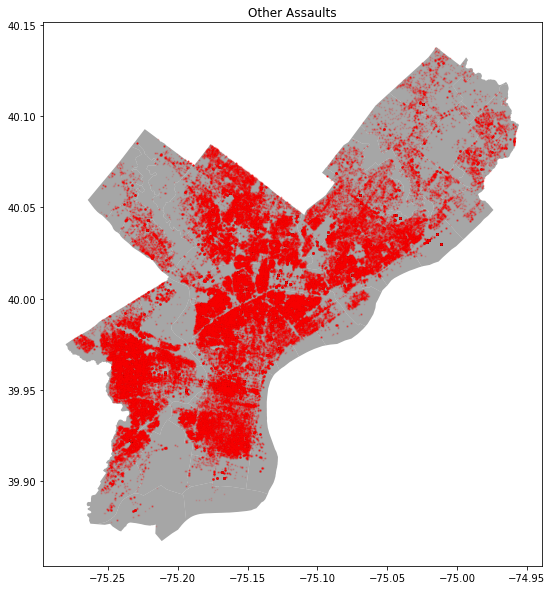

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
philly_map.plot(ax=ax, alpha=0.7,color='grey')

geo_df[geo_df['text_general_code']=='Other Assaults'].plot(ax=ax, markersize=1, color='red', alpha = 0.1)
plt.title('Other Assaults')

Text(0.5, 1.0, 'Thefts')

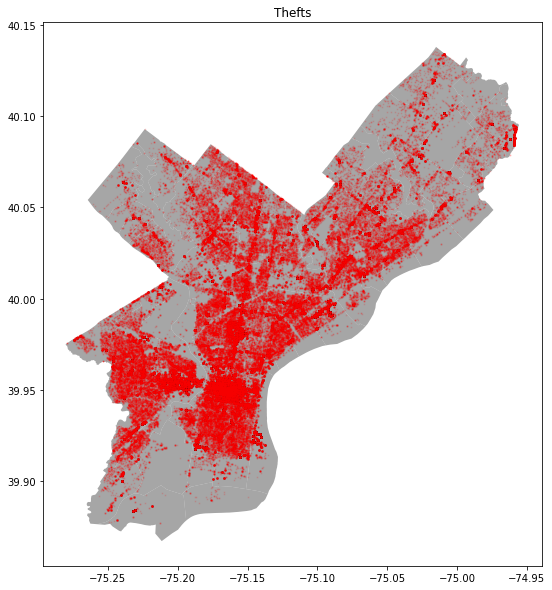

In [71]:
fig, ax = plt.subplots(figsize=(10,10))
philly_map.plot(ax=ax, alpha=0.7,color='grey')

geo_df[geo_df['text_general_code']=='Thefts'].plot(ax=ax, markersize=1, color='red', alpha = 0.1)
plt.title('Thefts')

Text(0.5, 1.0, 'Vandalism/Criminal Mischief')

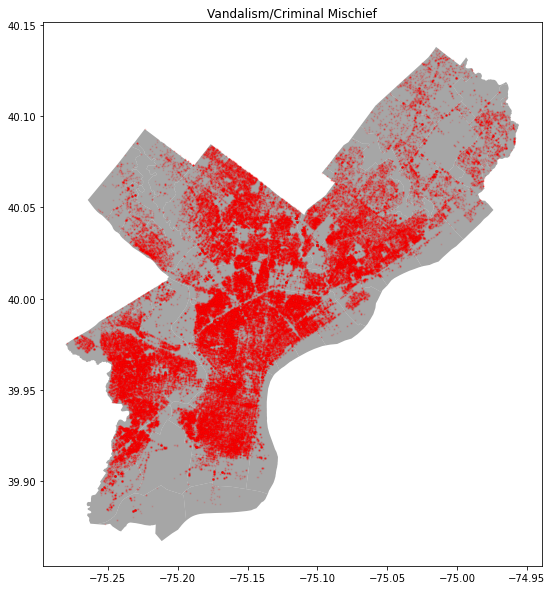

In [72]:
fig, ax = plt.subplots(figsize=(10,10))
philly_map.plot(ax=ax, alpha=0.7,color='grey')

geo_df[geo_df['text_general_code']=='Vandalism/Criminal Mischief'].plot(ax=ax, markersize=1, color='red', alpha = 0.1)
plt.title('Vandalism/Criminal Mischief')

Text(0.5, 1.0, 'Theft from Vehicle')

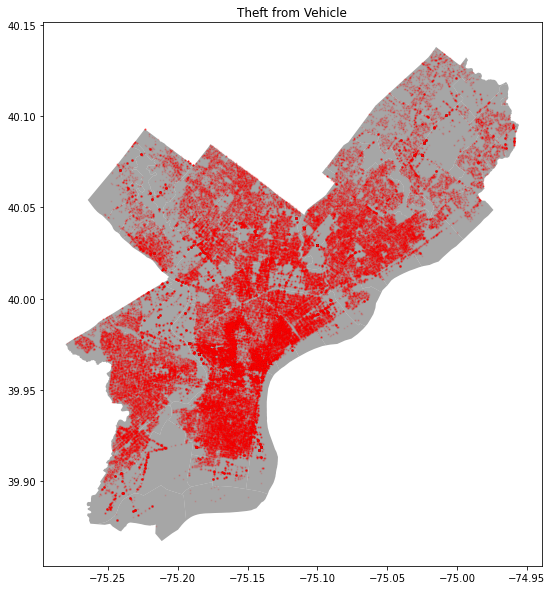

In [73]:
fig, ax = plt.subplots(figsize=(10,10))
philly_map.plot(ax=ax, alpha=0.7,color='grey')

geo_df[geo_df['text_general_code']=='Theft from Vehicle'].plot(ax=ax, markersize=1, color='red', alpha = 0.1)
plt.title('Theft from Vehicle')

Because of the enormous quantity of crime in the top five categories, it's difficult to identify any patterns in these categories.  Let's map the following categories of crime instead to see if there are any patterns:

- Homicide - Criminal
- Prostitution and Commercialized Vice

Text(0.5, 1.0, 'Homicide - Criminal')

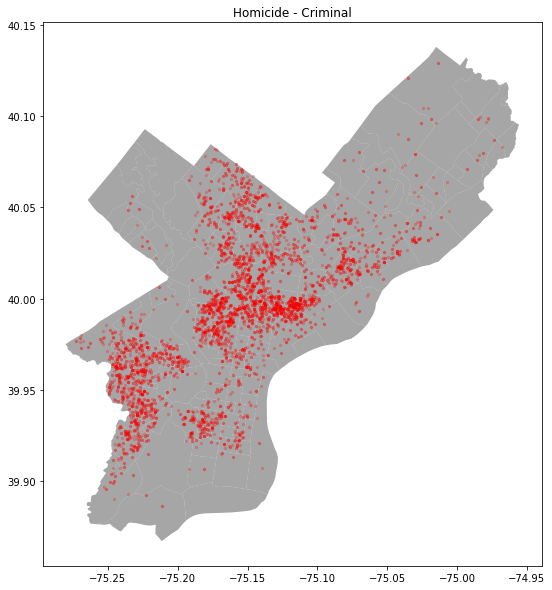

In [74]:
fig, ax = plt.subplots(figsize=(10,10))
philly_map.plot(ax=ax, alpha=0.7,color='grey')

geo_df[geo_df['text_general_code']=='Homicide - Criminal'].plot(ax=ax, markersize=5, color='red', alpha = 0.2)
plt.title('Homicide - Criminal')

Seems like most of the criminal cases of homicide are located in West Philadelphia and North Philadelphia.

There are a few neighborhoods with noticibly less cases of criminal homicide:

- Northwest Philadelphia (Chestnut Hill, Mount Airy, Manayunk, East Falls)
- Center City
- Northeast Philadelphia
- Deep South Philadelphia

Text(0.5, 1.0, 'Prostitution and Commercialized Vice')

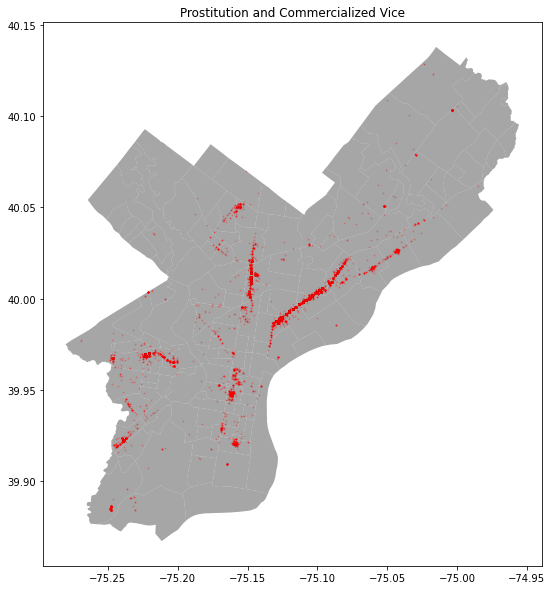

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
philly_map.plot(ax=ax, alpha=0.7,color='grey')

geo_df[geo_df['text_general_code']=='Prostitution and Commercialized Vice'].plot(ax=ax, markersize=1, color='red', alpha = 0.2)
plt.title('Prostitution and Commercialized Vice')

There are a few interesting linear-shaped patterns that most likely represent specific major streets in Philadelphia.  Prostitution and Commercialized Vice occurs on the following major streets:

- Ridge Ave
- Broad Street
- Front Street
- Kensington Ave
- Torresdale Ave

Text(0.5, 1.0, 'Narcotic / Drug Law Violations')

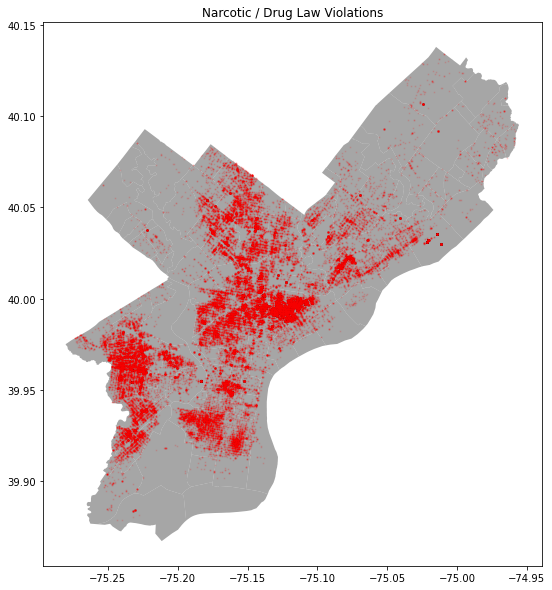

In [76]:
fig, ax = plt.subplots(figsize=(10,10))
philly_map.plot(ax=ax, alpha=0.7,color='grey')

geo_df[geo_df['text_general_code']=='Narcotic / Drug Law Violations'].plot(ax=ax, markersize=1, color='red', alpha = 0.1)
plt.title('Narcotic / Drug Law Violations')

Surprisingly, there are many more neighborhoods that are struggling with Narcotics violations than expected.  Originally, we suspected that the Kensington neighborhood (known as the 'Walmart of Heroin') would be the main location of this crime type.  While the Kensington area does seem to have the highest density of this crime type, many other neighborhoods are also high on the list.